In [283]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.stats import chi2_contingency
from phik import phik_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

Columns to check: Income<br>
Columns to drop: DanceActivities

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/DataMining_Proj_Group8/main/XYZ_sports_dataset.csv', 
                 index_col='ID', sep=';')

In [179]:
df.replace("", np.nan, inplace=True)

In [180]:
df.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 10000 to 24941
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14942 non-null  int64  
 1   Gender                      14942 non-null  object 
 2   Income                      14447 non-null  float64
 3   EnrollmentStart             14942 non-null  object 
 4   EnrollmentFinish            14942 non-null  object 
 5   LastPeriodStart             14942 non-null  object 
 6   LastPeriodFinish            14942 non-null  object 
 7   DateLastVisit               14942 non-null  object 
 8   DaysWithoutFrequency        14942 non-null  int64  
 9   LifetimeValue               14942 non-null  float64
 10  UseByTime                   14942 non-null  int64  
 11  AthleticsActivities         14906 non-null  float64
 12  WaterActivities             14905 non-null  float64
 13  FitnessActivities           1490

In [182]:
metric_features = ['Age','Income','DaysWithoutFrequency','LifetimeValue','NumberOfFrequencies','AttendedClasses','AllowedWeeklyVisitsBySLA',
                  'AllowedNumberOfVisitsBySLA','RealNumberOfVisits','NumberOfRenewals','NumberOfReferences']
non_metric_features = df.columns.drop(metric_features).to_list()

In [183]:
df.columns

Index(['Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')

In [184]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,14942.0,NaN,NaN,NaN,26.015794,14.156582,0.0,19.0,23.0,31.0,87.0
Gender,14942,2,Female,8931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,14447.0,NaN,NaN,NaN,2230.816086,1566.527734,0.0,1470.0,1990.0,2790.0,10890.0
EnrollmentStart,14942,1490,2015-03-02,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnrollmentFinish,14942,1300,2015-09-16,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodStart,14942,12,2019-07-01,3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodFinish,14942,11,2019-12-31,3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateLastVisit,14942,1384,2019-10-31,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.0,13.0,41.0,83.75,1745.0
LifetimeValue,14942.0,NaN,NaN,NaN,302.561871,364.319566,0.0,83.6,166.2,355.075,6727.8


In [185]:
df['Age'].value_counts()

Age
22    1187
21    1166
20     987
23     954
19     899
      ... 
79       4
85       3
84       2
86       1
87       1
Name: count, Length: 88, dtype: int64

In [186]:
df['Gender'].value_counts()

Gender
Female    8931
Male      6011
Name: count, dtype: int64

In [187]:
df['Income'].value_counts()

Income
0.0       2123
1890.0      84
1820.0      82
1970.0      80
1710.0      79
          ... 
8160.0       1
6510.0       1
6770.0       1
7810.0       1
6570.0       1
Name: count, Length: 737, dtype: int64

<Axes: >

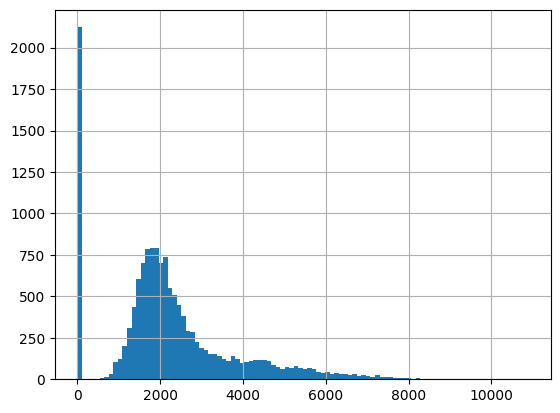

In [188]:
df['Income'].hist(bins=100)

<Axes: >

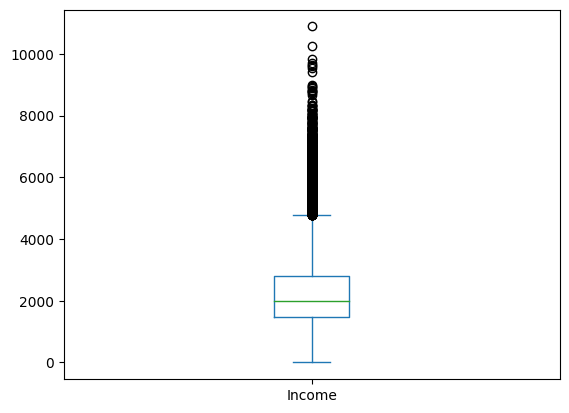

In [189]:
df['Income'].plot(kind='box')

In [190]:
df['EnrollmentStart'].value_counts()

EnrollmentStart
2015-03-02    92
2018-10-01    71
2014-09-29    69
2015-03-03    67
2016-03-01    62
              ..
2016-08-12     1
2018-06-21     1
2018-07-18     1
2017-07-14     1
2014-07-18     1
Name: count, Length: 1490, dtype: int64

In [191]:
df['EnrollmentFinish'].value_counts()

EnrollmentFinish
2015-09-16    1684
2016-07-31     890
2018-07-31     800
2019-10-31     735
2017-08-29     541
              ... 
2016-04-13       1
2017-12-29       1
2018-08-24       1
2019-05-16       1
2014-12-10       1
Name: count, Length: 1300, dtype: int64

In [192]:
df['LastPeriodStart'].value_counts()

LastPeriodStart
2019-07-01    3172
2016-01-01    1919
2018-01-01    1870
2019-01-01    1734
2015-01-01    1504
2017-01-01    1448
2018-07-01     838
2016-07-01     727
2015-07-01     674
2017-07-01     619
2014-07-01     432
2014-01-01       5
Name: count, dtype: int64

In [193]:
df['LastPeriodFinish'].value_counts()

LastPeriodFinish
2019-12-31    3694
2018-12-31    1748
2016-12-31    1722
2019-06-30    1501
2016-06-30    1197
2015-06-30    1017
2017-06-30     991
2018-06-30     987
2017-12-31     931
2015-12-31     853
2014-12-31     301
Name: count, dtype: int64

In [194]:
df['DateLastVisit'].value_counts()

DateLastVisit
2019-10-31    475
2019-10-30    438
2019-10-26    304
2019-10-29    278
2019-10-28    218
             ... 
2019-02-13      1
2014-12-13      1
2015-01-16      1
2016-01-09      1
2014-07-31      1
Name: count, Length: 1384, dtype: int64

In [195]:
df['DaysWithoutFrequency'].value_counts()

DaysWithoutFrequency
0       604
1       563
5       393
2       380
3       349
       ... 
392       1
709       1
474       1
1249      1
461       1
Name: count, Length: 660, dtype: int64

In [196]:
df['LifetimeValue'].value_counts()

LifetimeValue
43.60      188
53.60      146
47.20      129
37.60      124
83.60      118
          ... 
635.30       1
143.90       1
1061.25      1
275.90       1
919.60       1
Name: count, Length: 5668, dtype: int64

In [197]:
df['UseByTime'].value_counts()

UseByTime
0    14238
1      704
Name: count, dtype: int64

In [198]:
df['AthleticsActivities'].value_counts()

AthleticsActivities
0.0    14796
1.0      110
Name: count, dtype: int64

In [199]:
df['WaterActivities'].value_counts()

WaterActivities
0.0    10490
1.0     4415
Name: count, dtype: int64

In [200]:
df['FitnessActivities'].value_counts()

FitnessActivities
1.0    8587
0.0    6320
Name: count, dtype: int64

In [201]:
df['DanceActivities'].value_counts() 

DanceActivities
0.0    14906
Name: count, dtype: int64

In [202]:
df['TeamActivities'].value_counts()

TeamActivities
0.0    14079
1.0      828
Name: count, dtype: int64

In [203]:
df['RacketActivities'].value_counts()

RacketActivities
0.0    14556
1.0      349
Name: count, dtype: int64

In [204]:
df['CombatActivities'].value_counts()

CombatActivities
0.0    13300
1.0     1609
Name: count, dtype: int64

In [205]:
df['NatureActivities'].value_counts()

NatureActivities
0.0    14895
Name: count, dtype: int64

In [206]:
df['SpecialActivities'].value_counts()

SpecialActivities
0.0    14503
1.0      395
Name: count, dtype: int64

In [207]:
df['OtherActivities'].value_counts()

OtherActivities
0.0    14879
1.0       28
Name: count, dtype: int64

In [208]:
df['NumberOfFrequencies'].value_counts()

NumberOfFrequencies
2.0      661
3.0      623
1.0      609
4.0      583
5.0      556
        ... 
443.0      1
660.0      1
507.0      1
373.0      1
472.0      1
Name: count, Length: 415, dtype: int64

In [209]:
df['AttendedClasses'].value_counts()

AttendedClasses
0      10432
1        411
2        214
3        195
4        171
       ...  
268        1
312        1
139        1
290        1
202        1
Name: count, Length: 230, dtype: int64

In [210]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [211]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [212]:
df['AllowedNumberOfVisitsBySLA'].value_counts()

AllowedNumberOfVisitsBySLA
60.97    4462
17.42    1497
30.03    1205
28.98    1138
62.02     646
         ... 
32.58       1
0.86        1
53.57       1
17.15       1
15.87       1
Name: count, Length: 270, dtype: int64

In [213]:
df['RealNumberOfVisits'].value_counts()

RealNumberOfVisits
0     2698
1     1641
2     1635
3     1440
4     1323
5     1045
6      913
7      711
8      611
9      466
10     376
11     348
12     263
13     210
14     163
15     142
16     138
17     114
18      87
19      73
20      65
21      49
22      48
24      44
25      42
23      39
26      31
27      24
29      21
34      20
28      20
30      18
33      14
32      13
31      13
35       9
36       8
39       7
40       6
37       6
38       5
41       5
45       5
46       4
42       4
49       3
72       3
47       3
66       2
43       2
84       2
51       2
44       1
53       1
50       1
58       1
52       1
48       1
57       1
56       1
Name: count, dtype: int64

In [214]:
df['NumberOfRenewals'].value_counts()

NumberOfRenewals
0    6103
1    4020
2    2347
3    1209
4     733
5     444
6      86
Name: count, dtype: int64

In [215]:
df['HasReferences'].value_counts()

HasReferences
0.0    14633
1.0      297
Name: count, dtype: int64

In [216]:
df['NumberOfReferences'].value_counts() # check why there is difference on class 0 related to the 'HasReferences' column 
                                        # when it is 0 so no references

NumberOfReferences
0    14646
1      267
2       21
3        8
Name: count, dtype: int64

In [217]:
df['Dropout'].value_counts()

Dropout
1    11968
0     2974
Name: count, dtype: int64

In [218]:
# ProfileReport(df, title="Profile Report")

In [219]:
# profile = ProfileReport(df, title="Profile Report")
# profile.to_file(output_file="datamining_report.html")

In [220]:
# Alerts by the Profile Report 

# DanceActivities has constant value ""	Constant
# NatureActivities has constant value ""	Constant
# Age is highly overall correlated with Income and 2 other fields	High correlation
# Income is highly overall correlated with Age	High correlation
# DaysWithoutFrequency is highly overall correlated with RealNumberOfVisits	High correlation
# LifetimeValue is highly overall correlated with NumberOfFrequencies and 1 other fields	High correlation
# NumberOfFrequencies is highly overall correlated with LifetimeValue and 1 other fields	High correlation
# AttendedClasses is highly overall correlated with AllowedWeeklyVisitsBySLA and 1 other fields	High correlation
# AllowedWeeklyVisitsBySLA is highly overall correlated with AttendedClasses and 3 other fields	High correlation
# AllowedNumberOfVisitsBySLA is highly overall correlated with AttendedClasses and 1 other fields	High correlation
# RealNumberOfVisits is highly overall correlated with DaysWithoutFrequency	High correlation
# NumberOfRenewals is highly overall correlated with LifetimeValue and 1 other fields	High correlation
# LastPeriodStart is highly overall correlated with LastPeriodFinish and 1 other fields	High correlation
# LastPeriodFinish is highly overall correlated with LastPeriodStart and 1 other fields	High correlation
# WaterActivities is highly overall correlated with Age and 2 other fields	High correlation
# FitnessActivities is highly overall correlated with Age and 2 other fields	High correlation
# HasReferences is highly overall correlated with NumberOfReferences	High correlation
# NumberOfReferences is highly overall correlated with HasReferences	High correlation
# Dropout is highly overall correlated with LastPeriodStart and 1 other fields	High correlation
# UseByTime is highly imbalanced (72.6%)	Imbalance
# AthleticsActivities is highly imbalanced (93.7%)	Imbalance
# TeamActivities is highly imbalanced (69.1%)	Imbalance
# RacketActivities is highly imbalanced (84.0%)	Imbalance
# CombatActivities is highly imbalanced (50.6%)	Imbalance
# SpecialActivities is highly imbalanced (82.3%)	Imbalance
# OtherActivities is highly imbalanced (98.0%)	Imbalance
# HasReferences is highly imbalanced (85.9%)	Imbalance
# NumberOfReferences is highly imbalanced (92.4%)	Imbalance
# Income has 495 (3.3%) missing values	Missing
# AllowedWeeklyVisitsBySLA has 535 (3.6%) missing values	Missing
# ID is uniformly distributed	Uniform
# ID has unique values	Unique
# Income has 2123 (14.2%) zeros	Zeros
# DaysWithoutFrequency has 604 (4.0%) zeros	Zeros
# AttendedClasses has 10432 (69.8%) zeros	Zeros
# RealNumberOfVisits has 2698 (18.1%) zeros	Zeros
# NumberOfRenewals has 6103 (40.8%) zeros	Zeros

In [221]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [222]:
df.groupby('Gender')['Income'].agg({'min','max','mean','median'})

,median,max,mean,min
Gender,,,,
Female,1990.0,10890.0,2260.263401,0.0
Male,2000.0,9630.0,2186.800207,0.0


## Data Cleaning

Max removal of Outliers is 3%

In [223]:
# Missing values in Activities -> Person did not participate on them
# Missing values in NumberofFrequencies -> Person did not come yet to the gym

In [224]:
columns_to_fill = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities','DanceActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies']
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(0))

In [225]:
df['TotalActivities'] = df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities','DanceActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities']].sum(axis=1)

In [226]:
df['TotalActivities'].value_counts()

TotalActivities
1.0    13607
2.0     1187
3.0       98
0.0       39
4.0        9
5.0        2
Name: count, dtype: int64

In [227]:
columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities','DanceActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities', 'Dropout', 'UseByTime']

In [228]:
for col in columns:
    df[col] = df[col].astype(bool)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 10000 to 24941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14942 non-null  int64  
 1   Gender                      14942 non-null  object 
 2   Income                      14447 non-null  float64
 3   EnrollmentStart             14942 non-null  object 
 4   EnrollmentFinish            14942 non-null  object 
 5   LastPeriodStart             14942 non-null  object 
 6   LastPeriodFinish            14942 non-null  object 
 7   DateLastVisit               14942 non-null  object 
 8   DaysWithoutFrequency        14942 non-null  int64  
 9   LifetimeValue               14942 non-null  float64
 10  UseByTime                   14942 non-null  bool   
 11  AthleticsActivities         14942 non-null  bool   
 12  WaterActivities             14942 non-null  bool   
 13  FitnessActivities           1494

<Axes: >

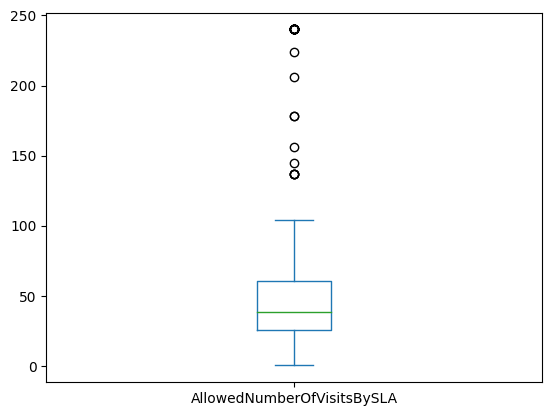

In [230]:
df['AllowedNumberOfVisitsBySLA'].plot(kind='box')

In [231]:
df['AllowedNumberOfVisitsBySLA'].describe()

count    14942.000000
mean        41.636299
std         21.066166
min          0.560000
25%         25.720000
50%         38.990000
75%         60.970000
max        240.030000
Name: AllowedNumberOfVisitsBySLA, dtype: float64

In [232]:
df[df['AllowedNumberOfVisitsBySLA']>120]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,TotalActivities
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11158,26,Male,1990.0,2015-03-17,2015-09-16,2015-01-01,2016-06-30,2015-06-02,106,181.60,False,False,True,False,False,False,False,False,False,False,False,33.0,0,7.0,240.03,1,1,0.0,0,True,1.0
11998,17,Male,1130.0,2015-02-28,2015-09-16,2015-01-01,2016-06-30,2015-06-17,91,165.10,False,False,False,False,False,False,False,True,False,False,False,0.0,0,7.0,240.03,1,1,0.0,0,True,1.0
12203,22,Female,2640.0,2015-03-09,2015-09-16,2015-01-01,2015-12-31,2015-05-11,128,112.60,False,False,False,False,False,False,False,True,False,False,False,8.0,0,7.0,178.01,0,1,0.0,0,True,1.0
12328,36,Female,2770.0,2015-03-05,2015-09-16,2015-01-01,2016-06-30,2015-06-27,81,178.60,False,False,True,False,False,False,False,False,False,False,False,11.0,0,7.0,240.03,4,1,0.0,0,True,1.0
12943,27,Male,1760.0,2014-06-18,2015-09-16,2015-01-01,2016-06-30,2015-05-12,127,160.60,False,False,True,False,False,False,False,False,False,False,False,23.0,4,7.0,240.03,0,2,1.0,0,True,1.0
12980,32,Male,1980.0,2015-05-16,2015-09-16,2015-01-01,2016-06-30,2015-05-19,120,53.10,False,False,False,False,False,False,False,True,False,False,False,1.0,0,7.0,240.03,0,1,0.0,0,True,1.0
13090,19,Female,1400.0,2015-03-04,2015-09-16,2015-01-01,2016-06-30,2015-04-07,162,118.27,False,False,False,False,False,True,False,False,False,False,False,4.0,4,4.0,137.16,0,1,0.0,0,True,1.0
13177,28,Male,2760.0,2015-04-01,2015-09-16,2015-01-01,2016-06-30,2015-04-29,140,152.10,False,False,False,False,False,False,False,True,False,False,False,11.0,0,7.0,240.03,0,1,0.0,0,True,1.0
13673,30,Female,3540.0,2015-03-03,2015-09-16,2015-01-01,2016-06-30,2015-06-23,85,178.60,False,False,True,False,False,False,False,False,False,False,False,24.0,0,7.0,240.03,6,1,0.0,0,True,1.0


In [233]:
df[df['Income'].isna()]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,TotalActivities
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10068,43,Female,NaN,2016-09-16,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,849.80,True,False,False,True,False,False,False,False,False,False,False,214.0,0,7.0,21.98,9,3,0.0,0,True,1.0
10076,9,Male,NaN,2017-09-16,2017-09-16,2019-07-01,2019-12-31,2019-10-26,5,708.20,False,False,True,False,False,False,False,False,False,False,False,64.0,64,2.0,17.42,6,2,0.0,0,False,1.0
10156,37,Female,NaN,2016-03-16,2016-04-01,2016-01-01,2016-06-30,2016-03-21,11,41.60,False,False,True,False,False,False,False,False,False,False,False,1.0,1,2.0,4.58,1,0,0.0,0,True,1.0
10158,64,Female,NaN,2015-10-12,2016-04-20,2016-01-01,2016-06-30,2016-01-23,88,185.60,False,False,False,False,False,False,False,False,False,True,False,24.0,24,2.0,17.14,0,0,0.0,0,True,1.0
10224,7,Male,NaN,2016-04-20,2018-11-11,2018-07-01,2018-12-31,2018-10-25,17,836.60,False,False,True,False,False,True,False,False,False,False,False,107.0,91,2.0,11.72,6,3,0.0,0,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,4,Female,NaN,2016-03-05,2016-03-05,2019-07-01,2019-12-31,2019-10-26,5,1656.30,False,False,True,False,False,False,False,False,False,False,False,95.0,88,2.0,9.72,3,4,0.0,0,False,1.0
24836,5,Male,NaN,2018-07-02,2018-07-02,2019-07-01,2019-12-31,2019-10-30,1,654.60,False,False,True,False,False,False,False,False,False,False,False,20.0,20,2.0,15.42,9,2,0.0,0,False,1.0
24874,15,Male,NaN,2015-11-02,2016-07-31,2016-01-01,2016-12-31,2016-05-30,62,353.60,False,False,False,False,False,False,True,False,False,False,False,20.0,17,1.0,8.71,0,0,0.0,0,True,1.0


When the Age is 16 or below the Income is 0

In [234]:
df[df['Age']<=16]['Income'].describe()

count    2161.000000
mean       33.993522
std       278.269317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3870.000000
Name: Income, dtype: float64

In [235]:
younger_16 = df[df['Age']<=16]['Income']
younger_16

ID
10003    0.0
10009    0.0
10013    0.0
10025    0.0
10031    0.0
        ... 
24913    0.0
24917    0.0
24919    0.0
24930    NaN
24937    0.0
Name: Income, Length: 2524, dtype: float64

In [236]:
(younger_16[younger_16==0].count()*100)/younger_16.shape[0]

84.11251980982567

As you can see the vast majority (84%) and also the median and the third quartile are equal to zero so in the next step we fill
the values of NaN's of people younger or equal to 16 with 0.

In [237]:
df[df['Age']<=16]['Income'].isna().sum()

363

In [238]:
df.loc[df['Age']<=16, 'Income'] = df.loc[df['Age']<=16, 'Income'].fillna(0)

In [239]:
df[df['Age']<=16]['Income'].isna().sum()

0

In [240]:
df['Income'].isna().sum()

132

So, after filling the NaN's of Income that are <= 16 of Age, we then have 132 missing values left. 

In [241]:
df[df['Age']>16]['Income'].median()

2150.0

In [242]:
df[(df['Age']>16)&(df['Income'].isna())]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,TotalActivities
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10068,43,Female,NaN,2016-09-16,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,849.80,True,False,False,True,False,False,False,False,False,False,False,214.0,0,7.0,21.98,9,3,0.0,0,True,1.0
10156,37,Female,NaN,2016-03-16,2016-04-01,2016-01-01,2016-06-30,2016-03-21,11,41.60,False,False,True,False,False,False,False,False,False,False,False,1.0,1,2.0,4.58,1,0,0.0,0,True,1.0
10158,64,Female,NaN,2015-10-12,2016-04-20,2016-01-01,2016-06-30,2016-01-23,88,185.60,False,False,False,False,False,False,False,False,False,True,False,24.0,24,2.0,17.14,0,0,0.0,0,True,1.0
10259,35,Female,NaN,2015-09-25,2016-04-04,2016-01-01,2016-06-30,2015-10-06,181,281.60,False,False,False,True,False,False,True,False,False,False,False,1.0,1,7.0,59.99,0,0,0.0,0,True,2.0
10315,22,Female,NaN,2018-04-17,2019-07-09,2019-01-01,2019-12-31,2019-06-24,15,98.50,False,False,False,True,False,False,False,False,False,False,False,11.0,0,7.0,28.00,1,2,0.0,0,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,19,Female,NaN,2015-03-11,2015-09-16,2015-01-01,2015-12-31,2015-04-27,142,88.60,False,False,False,False,False,False,True,False,False,False,False,7.0,7,2.0,17.42,0,1,0.0,0,True,1.0
24431,21,Female,NaN,2015-05-13,2015-09-16,2015-01-01,2015-12-31,2015-07-10,68,62.85,False,False,False,True,False,False,False,False,False,False,False,19.0,0,7.0,28.98,8,1,0.0,0,True,1.0
24574,21,Male,NaN,2017-01-25,2017-02-24,2017-01-01,2017-06-30,2017-02-07,17,50.00,False,False,False,True,False,False,False,False,False,False,False,3.0,0,7.0,30.03,3,0,0.0,0,True,1.0


We then filled the rest of Income NaN´s (Age > 16) with the median of Income when Age > 16

In [243]:
df.loc[(df['Age']>16)&(df['Income'].isna()), 'Income'] = df.loc[(df['Age']>16)&(df['Income'].isna()), 'Income'].fillna(df[df['Age']>16]['Income'].median())

In [244]:
df['Income'].isna().sum()

0

In [245]:
df['AllowedWeeklyVisitsBySLA'].isna().sum()

535

In [246]:
(df['AllowedWeeklyVisitsBySLA'].isna().sum())/df.shape[0]

0.03580511310400214

In [247]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [248]:
# We are going to fill the missing values with 0 because we think this are the cases where people are not allowed to go to the 
# gym because they dont have a subscription

In [249]:
df['AllowedWeeklyVisitsBySLA'] = df['AllowedWeeklyVisitsBySLA'].fillna(0)

In [250]:
df['HasReferences'].isna().sum()

12

In [251]:
df['HasReferences'].value_counts()

HasReferences
0.0    14633
1.0      297
Name: count, dtype: int64

In [252]:
# We are going to fill HasReferences with 0 because we think this are cases where the gym simply did not put in the database
# that those clients do not have a reference (by human error, forgetting) and also the class 0 is the majority class (mode).

In [253]:
df['HasReferences'] = df['HasReferences'].fillna(0)

In [254]:
metric_features.append('TotalActivities')

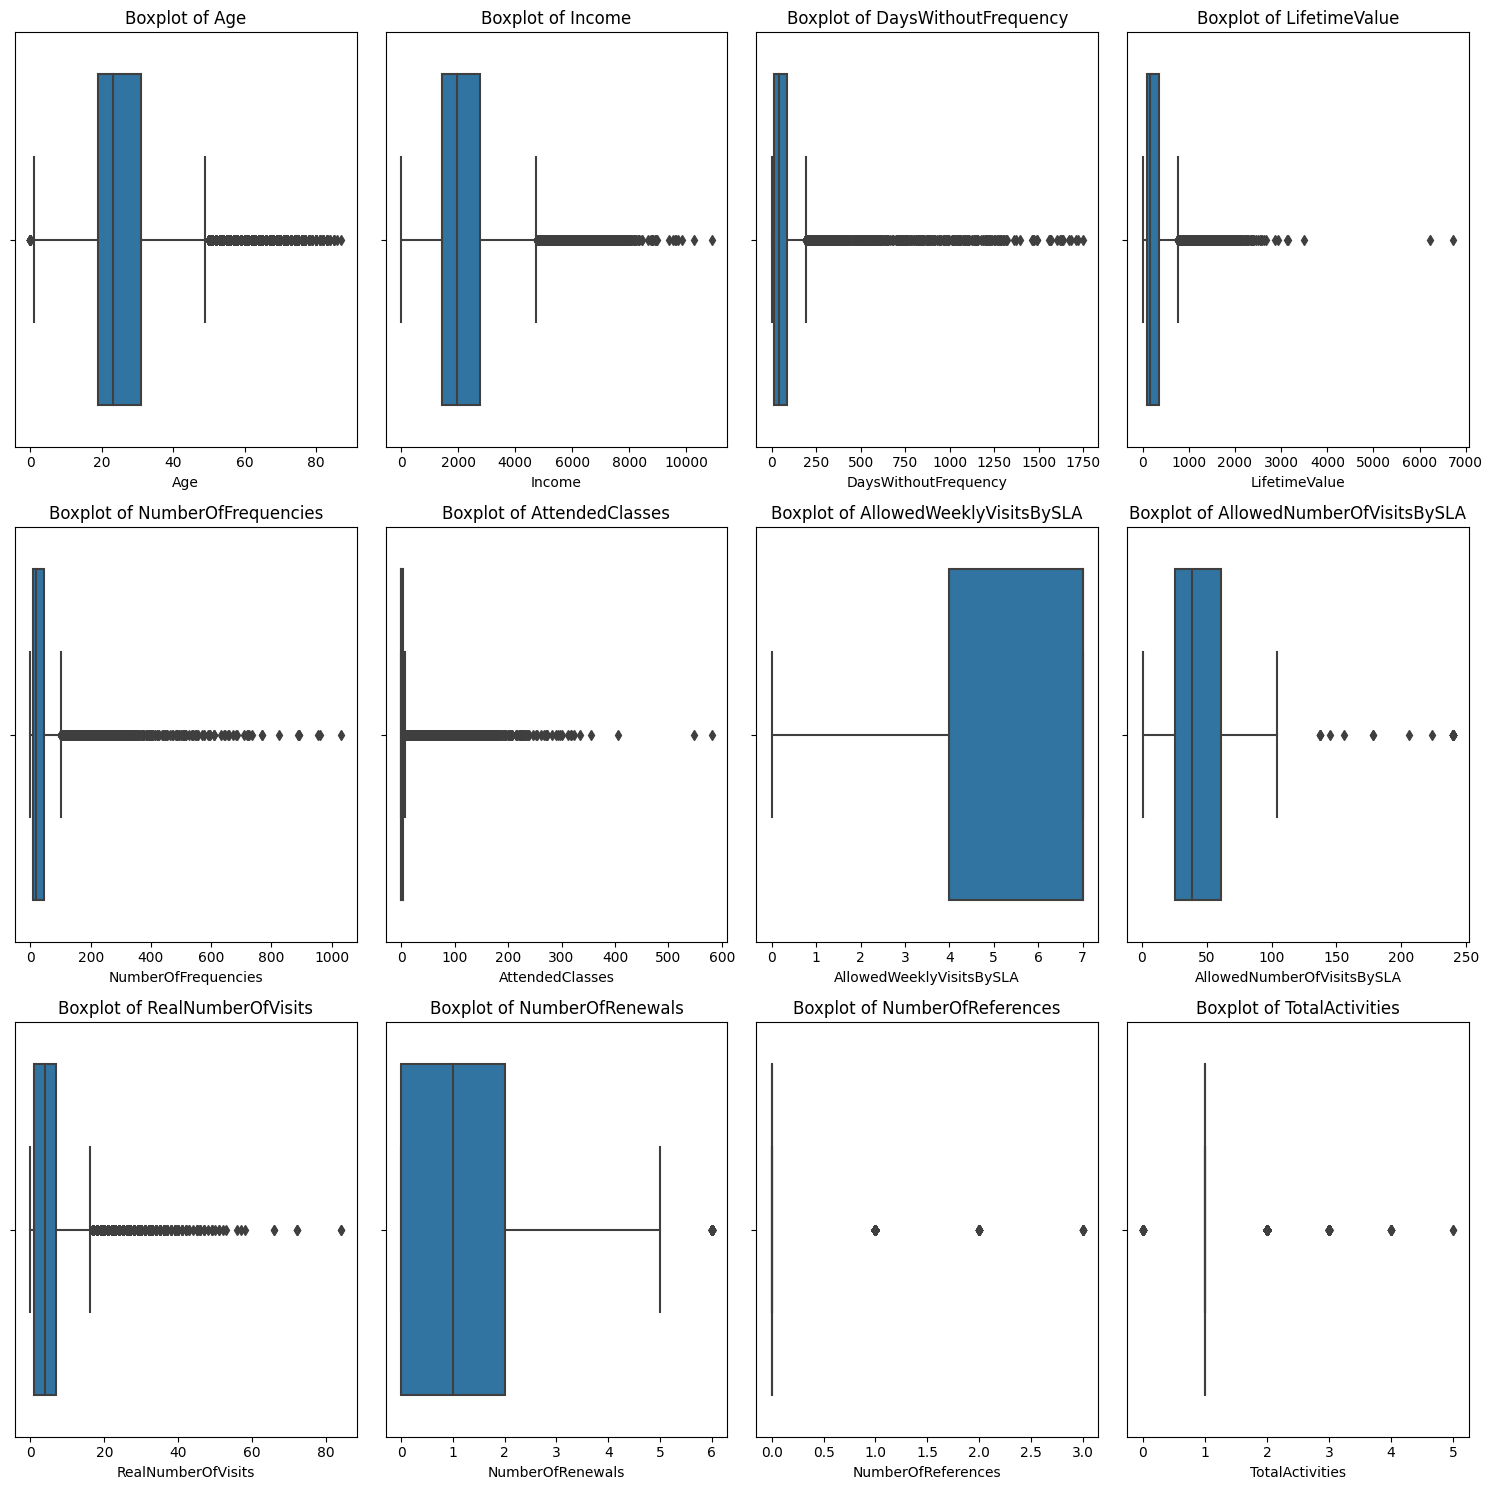

In [255]:
# Determine the number of rows needed for the plot
n_rows = int(np.ceil(len(metric_features) / 4))

# Create a figure and axes objects
fig, axs = plt.subplots(n_rows, 4, figsize=(15, n_rows * 5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

# Create a boxplot for each column
for i, feature in enumerate(metric_features):
    sns.boxplot(x=df[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')

# Display the plot
plt.tight_layout()
plt.show()

In [256]:
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    q25 = df[metric].quantile(.25)
    q75 = df[metric].quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr

    print('Variable name:', metric)
    print('Lower Limit:', lower_lim)
    print('Upper Limit:', upper_lim)
    print('')

# filters2 = pd.Series(np.all(filters2, 0))
# df_2 = df[filters2]
# print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0],4))

Variable name: Age
Lower Limit: 1.0
Upper Limit: 49.0

Variable name: Income
Lower Limit: -575.0
Upper Limit: 4745.0

Variable name: DaysWithoutFrequency
Lower Limit: -93.125
Upper Limit: 189.875

Variable name: LifetimeValue
Lower Limit: -323.61250000000007
Upper Limit: 762.2875000000001

Variable name: NumberOfFrequencies
Lower Limit: -50.0
Upper Limit: 102.0

Variable name: AttendedClasses
Lower Limit: -4.5
Upper Limit: 7.5

Variable name: AllowedWeeklyVisitsBySLA
Lower Limit: -0.5
Upper Limit: 11.5

Variable name: AllowedNumberOfVisitsBySLA
Lower Limit: -27.155
Upper Limit: 113.845

Variable name: RealNumberOfVisits
Lower Limit: -8.0
Upper Limit: 16.0

Variable name: NumberOfRenewals
Lower Limit: -3.0
Upper Limit: 5.0

Variable name: NumberOfReferences
Lower Limit: 0.0
Upper Limit: 0.0

Variable name: TotalActivities
Lower Limit: 1.0
Upper Limit: 1.0



In [257]:
# # This may vary from session to session, and is prone to varying interpretations.
# # A simple example is provided below:

# filters1 = (
#     (df['house_keeping']<=50)
#     &
#     (df['kitchen']<=40)
#     &
#     (df['toys']<=35)
#     &
#     (df['education']!='OldSchool')
# )

# df_1 = df[filters1]
# print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df_original.shape[0], 4))

In [258]:
df['Days_between'] = (pd.to_datetime(df['EnrollmentFinish'])-pd.to_datetime(df['EnrollmentStart'])).dt.days

In [259]:
metric_features.append('Days_between')

In [260]:
df['Days_between']

ID
10000      58
10001     398
10002      30
10003     160
10004     778
         ... 
24937       0
24938     261
24939      30
24940       0
24941    1166
Name: Days_between, Length: 14942, dtype: int64

## Feature Selection

### Metric Features

Between the metric_feature we are going to drop DaysWithoutFrequency, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, 

In [261]:
df[metric_features].var()

Age                           2.004088e+02
Income                        2.490657e+06
DaysWithoutFrequency          2.079352e+04
LifetimeValue                 1.327287e+05
NumberOfFrequencies           4.281195e+03
AttendedClasses               8.499675e+02
AllowedWeeklyVisitsBySLA      5.474131e+00
AllowedNumberOfVisitsBySLA    4.437833e+02
RealNumberOfVisits            4.010636e+01
NumberOfRenewals              1.908003e+00
NumberOfReferences            2.781465e-02
TotalActivities               1.073377e-01
Days_between                  1.273220e+05
dtype: float64

In [262]:
# Since no variable as a variance of 0, we dont need to drop any variable here

In [263]:
scaler = StandardScaler()
df[metric_features] = scaler.fit_transform(df[metric_features])

In [264]:
df[metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,TotalActivities,Days_between
ID,,,,,,,,,,,,,
10000,2.400674,2.106351,-0.556365,-0.585253,-0.474574,-0.108134,-2.373620,-1.678401,-0.524371,-0.872581,-0.133633,-0.281705,-0.666193
10001,0.210807,0.287741,-0.147196,0.484860,-0.260600,-0.313943,-1.518776,-1.149574,-0.682280,0.575374,-0.133633,-0.281705,0.286695
10002,-0.213038,-0.124139,-0.514755,-0.727303,-0.520425,-0.348245,0.618335,-0.550963,0.107267,-0.872581,-0.133633,-0.281705,-0.744666
10003,-1.202011,-1.378789,-0.410729,-0.403950,-0.306452,-0.279642,-1.518776,-1.135332,-0.366461,-0.872581,-0.133633,-0.281705,-0.380326
10004,0.634652,1.358630,0.893063,0.193897,0.014508,-0.348245,0.618335,0.917792,-0.840189,1.299351,-0.133633,-0.281705,1.351687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.848806,-1.378789,-0.549430,3.178327,1.099660,2.944701,-0.663932,-0.322628,0.423086,1.299351,-0.133633,-0.281705,-0.828744
24938,0.917216,-0.016416,-0.299768,0.113333,0.259050,-0.348245,0.618335,0.917792,-0.366461,-0.872581,-0.133633,-0.281705,-0.097263
24939,-0.424961,-0.231861,-0.549430,-0.710833,-0.520425,-0.348245,0.618335,-0.550963,0.423086,-0.872581,-0.133633,-0.281705,-0.744666


In [265]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [266]:
cor_spearman = df[metric_features].corr(method ='spearman')
cor_spearman

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,TotalActivities,Days_between
Age,1.000000,0.870325,0.022863,-0.021569,0.083788,-0.307347,0.348813,0.306289,0.074354,0.000309,-0.120568,0.078172,0.067726
Income,0.870325,1.000000,0.020272,-0.063257,0.048329,-0.312056,0.345907,0.289064,0.069882,-0.023134,-0.119309,0.066317,0.042819
DaysWithoutFrequency,0.022863,0.020272,1.000000,-0.117055,-0.271028,-0.101979,0.111647,0.103092,-0.538539,0.072349,0.031131,-0.033558,0.414026
LifetimeValue,-0.021569,-0.063257,-0.117055,1.000000,0.740562,0.490897,-0.257758,-0.087539,0.010590,0.664716,0.156015,0.198806,0.290357
NumberOfFrequencies,0.083788,0.048329,-0.271028,0.740562,1.000000,0.242909,0.020758,0.079938,0.409364,0.541580,0.089120,0.143876,0.227739
AttendedClasses,-0.307347,-0.312056,-0.101979,0.490897,0.242909,1.000000,-0.759018,-0.556438,-0.072711,0.307630,0.184437,0.085320,-0.000134
AllowedWeeklyVisitsBySLA,0.348813,0.345907,0.111647,-0.257758,0.020758,-0.759018,1.000000,0.696881,0.122765,-0.097404,-0.150004,0.039100,0.095926
AllowedNumberOfVisitsBySLA,0.306289,0.289064,0.103092,-0.087539,0.079938,-0.556438,0.696881,1.000000,0.070341,-0.130872,-0.111614,0.016873,0.121924
RealNumberOfVisits,0.074354,0.069882,-0.538539,0.010590,0.409364,-0.072711,0.122765,0.070341,1.000000,0.021846,-0.050867,-0.009167,-0.190357
NumberOfRenewals,0.000309,-0.023134,0.072349,0.664716,0.541580,0.307630,-0.097404,-0.130872,0.021846,1.000000,0.134044,0.201739,0.306818


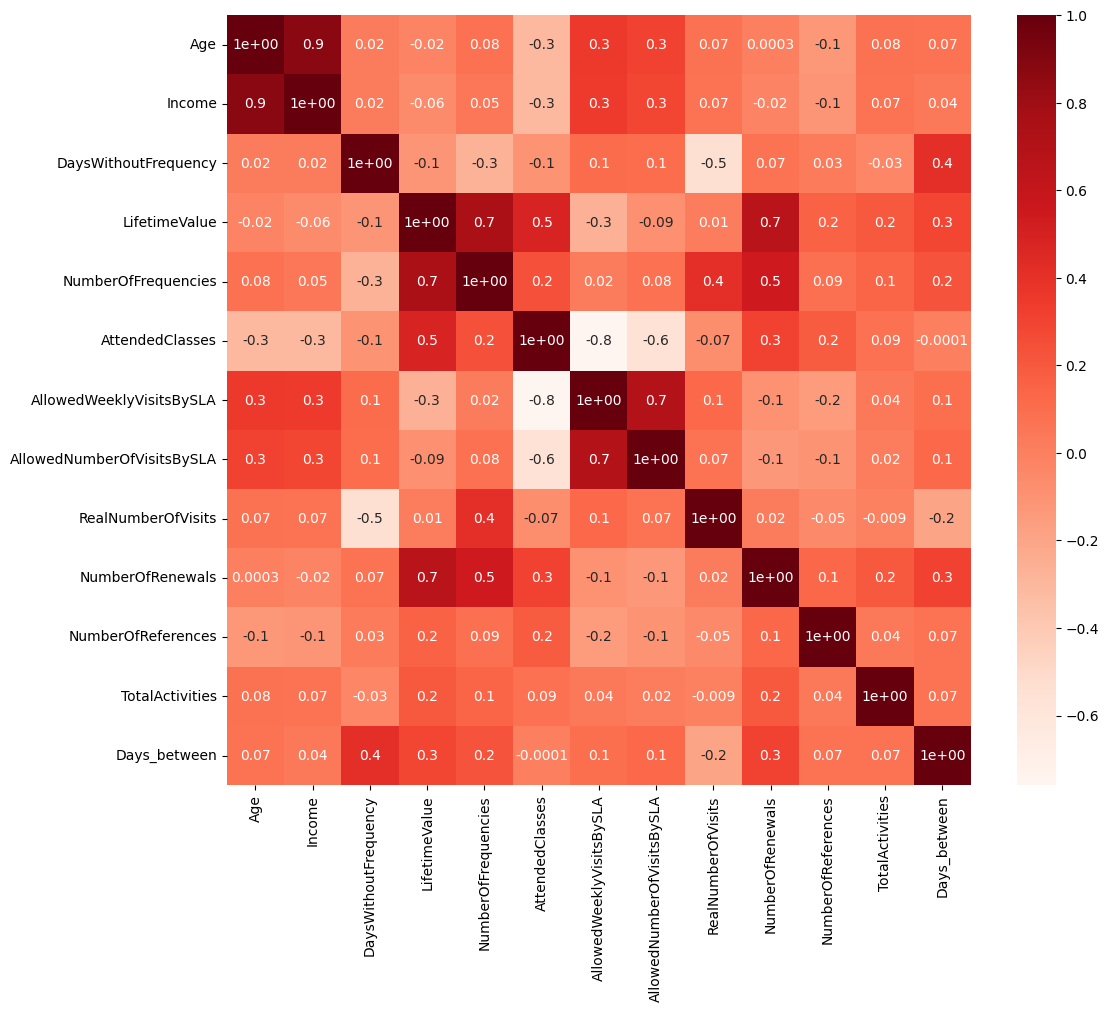

In [267]:
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Age vs Income (0.9) 
    - NumerOfFrequencies vs LifetimeValue (0.7) 
    - NumerOfRenewals vs LifetimeValue (0.7)
    - AllowedNumberOfVisitsBySLA vs AllowedWeeklyVisitsBySLA (0.7)
    
We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the LifetimeValue since it is correlated with both variables, but maybe this can have a higher influence on the target).

Since AllowedNumberOfVisitsBySLA is less correlated to other features than AllowedWeeklyVisitsBySLA, we are going to drop the second

In [268]:
metric_features.remove('Income')
metric_features.remove('LifetimeValue')
metric_features.remove('AllowedNumberOfVisitsBySLA')

### Principal Components Analysis

In [270]:
df_pca = df.copy()

In [271]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat 

array([[-0.95396966, -0.4057429 , -0.68356582, ..., -1.65794564,
        -0.31831333,  0.26181306],
       [ 0.12978709, -0.98468953,  0.23839095, ..., -1.02587365,
        -0.69347463, -0.30125347],
       [-1.35740107,  0.28019908, -0.5089468 , ...,  0.34946134,
         0.18592478, -0.03927145],
       ...,
       [-1.3123058 ,  0.30362139, -0.69125243, ...,  0.28043689,
         0.26846142, -0.10745857],
       [ 3.15192409, -0.40940005, -2.77800046, ...,  1.8037949 ,
         1.2698008 ,  0.89732208],
       [ 2.92610177,  1.77640526,  0.3193899 , ..., -1.03394784,
        -0.33631402, -0.2008839 ]])

In [272]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,2.346629,0.000000,0.234647,0.234647
2,1.658921,-0.687709,0.165881,0.400528
3,1.479961,-0.178960,0.147986,0.548514
4,0.921540,-0.558421,0.092148,0.640662
5,0.894969,-0.026571,0.089491,0.730153
6,0.775118,-0.119850,0.077507,0.807660
7,0.688479,-0.086639,0.068843,0.876503
8,0.550230,-0.138248,0.055019,0.931522
9,0.378433,-0.171798,0.037841,0.969363
10,0.306390,-0.072042,0.030637,1.000000


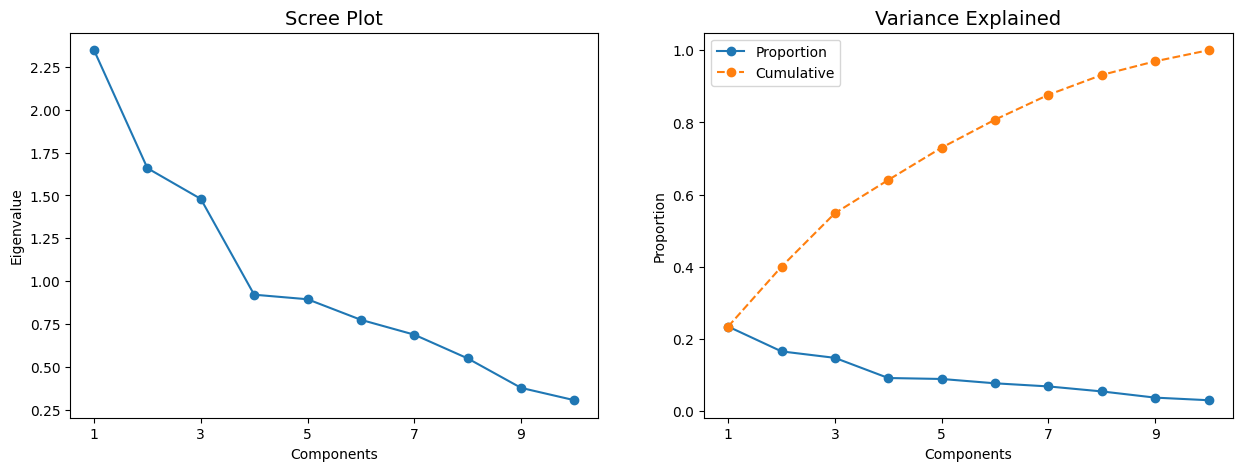

In [273]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [877]:
# 3 rules of Thumb: 
# 1 rule: Keeping up to 80% of the variance (on the comulative) 
# 2 rule: Look at the Elbow on the EIGENVALUES (EXPLAINED VARIANCE) 

In [878]:
# In this case: 
# 1 rule: 5,6 Principal Components 
# 2 rule: 4 Principal Components
# 3 rule: PC var greater or equal to 0.1 -> 3, 4 Principal Components

In [274]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=6)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5
ID,,,,,,
10000,-0.953970,-0.405743,-0.683566,0.252652,0.139142,2.922568
10001,0.129787,-0.984690,0.238391,-0.073873,-0.406635,0.803683
10002,-1.357401,0.280199,-0.508947,0.064159,0.194927,-0.314211
10003,-0.940645,-1.567428,-0.729149,0.171322,-0.487375,-0.367201
10004,0.911766,0.384113,1.977952,-0.631092,-0.104303,0.377428
...,...,...,...,...,...,...
24937,2.123763,-1.238781,-2.084242,-0.446813,-0.827238,0.420448
24938,-0.764809,0.872218,0.039886,-0.079783,0.357194,0.637106
24939,-1.312306,0.303621,-0.691252,0.013359,0.160848,-0.601027


In [275]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,TotalActivities,Days_between,PC0,PC1,PC2,PC3,PC4,PC5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000,2.400674,Female,2.106351,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,-0.556365,-0.585253,False,False,False,True,False,False,False,False,False,False,False,-0.474574,-0.108134,-2.373620,-1.678401,-0.524371,-0.872581,0.0,-0.133633,False,-0.281705,-0.666193,-0.953970,-0.405743,-0.683566,0.252652,0.139142,2.922568
10001,0.210807,Female,0.287741,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,-0.147196,0.484860,False,False,False,False,False,False,False,False,False,True,False,-0.260600,-0.313943,-1.518776,-1.149574,-0.682280,0.575374,0.0,-0.133633,True,-0.281705,0.286695,0.129787,-0.984690,0.238391,-0.073873,-0.406635,0.803683
10002,-0.213038,Male,-0.124139,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,-0.514755,-0.727303,False,False,False,True,False,False,False,False,False,False,False,-0.520425,-0.348245,0.618335,-0.550963,0.107267,-0.872581,0.0,-0.133633,True,-0.281705,-0.744666,-1.357401,0.280199,-0.508947,0.064159,0.194927,-0.314211
10003,-1.202011,Male,-1.378789,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,-0.410729,-0.403950,False,False,False,False,False,True,False,False,False,False,False,-0.306452,-0.279642,-1.518776,-1.135332,-0.366461,-0.872581,0.0,-0.133633,True,-0.281705,-0.380326,-0.940645,-1.567428,-0.729149,0.171322,-0.487375,-0.367201
10004,0.634652,Male,1.358630,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,0.893063,0.193897,False,False,False,True,False,False,False,False,False,False,False,0.014508,-0.348245,0.618335,0.917792,-0.840189,1.299351,0.0,-0.133633,True,-0.281705,1.351687,0.911766,0.384113,1.977952,-0.631092,-0.104303,0.377428


In [276]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3,PC4,PC5
Age,0.024687,0.644124,0.130601,-0.018241,0.206703,0.704182
DaysWithoutFrequency,0.130003,-0.115286,0.740400,-0.252376,-0.043096,-0.071156
NumberOfFrequencies,0.749640,0.357230,-0.303188,-0.106904,-0.027522,-0.035164
AttendedClasses,0.620369,-0.402716,-0.356200,-0.044524,-0.100747,0.265097
AllowedWeeklyVisitsBySLA,-0.162573,0.724995,0.268102,-0.040000,0.182180,-0.247859
RealNumberOfVisits,0.249566,0.515085,-0.533290,-0.194357,0.031892,-0.334818
NumberOfRenewals,0.855561,-0.015327,0.190362,-0.087621,-0.111249,0.025000
NumberOfReferences,0.293473,-0.342193,-0.011849,0.061044,0.885225,-0.087379
TotalActivities,0.346719,0.176348,0.141086,0.883673,-0.080039,-0.087479
Days_between,0.595908,0.038321,0.532213,-0.111282,-0.052975,-0.114753


### Non Metric Features

In [277]:
non_metric_features

['Gender',
 'EnrollmentStart',
 'EnrollmentFinish',
 'LastPeriodStart',
 'LastPeriodFinish',
 'DateLastVisit',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'DanceActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'NatureActivities',
 'SpecialActivities',
 'OtherActivities',
 'HasReferences',
 'Dropout']

interval columns not set, guessing: ['HasReferences']


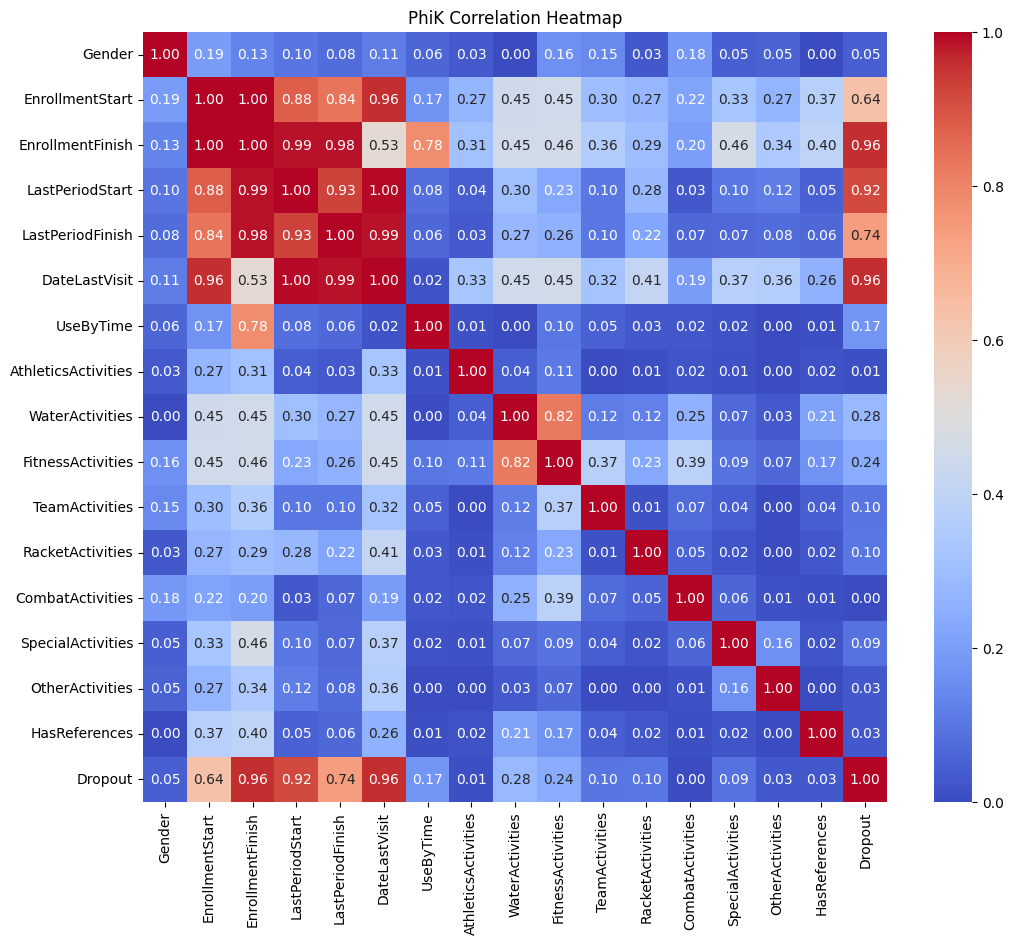

In [271]:
phik_corr_matrix = df[non_metric_features].phik_matrix()

# Plotting a heatmap for the PhiK correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PhiK Correlation Heatmap')
plt.show()

Activities: 

FitnessActivities vs WaterActivities (0.82)
FitnessActivities vs TeamActivities (0.37)
FitnessActivities vs RacketActivities (0.23)
FitnessActivities vs CombatActivities (0.39)
CombatActivities vs WaterActivities (0.25)

AthleticsActivities have no corr with other activities except a very low one with FitnessActivities (0.11)

SpecialActivities have no corr with other activities except a very low one with OtherActivities (0.16) 

Gender vs FitnessActivities (0.16)
Gender vs TeamActivities (0.16)
Gender vs CombatActivities (0.16)

UseByTime vs Dropout (0.17)

HasReferences vs WaterActivities (0.21)
HasReferences vs FitnessActivities (0.17)

Dropout vs WaterActivities (0.28)
Dropout vs FitnessActivities (0.24)
Dropout vs TeamActivities (0.10)
Dropout vs RacketActivities (0.10)
Dropout vs SpecialActivities (0.10)

Fitness and Water Activities are highly negative correlated

In [279]:
non_metric_features.remove('EnrollmentStart')
non_metric_features.remove('EnrollmentFinish')
non_metric_features.remove('LastPeriodStart')
non_metric_features.remove('LastPeriodFinish')
non_metric_features.remove('DateLastVisit')

In [280]:
non_metric_features

['Gender',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'DanceActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'NatureActivities',
 'SpecialActivities',
 'OtherActivities',
 'HasReferences',
 'Dropout']

In [281]:
df_ohc = df.copy()

In [284]:
ohc = OneHotEncoder(sparse_output=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

,Gender_Male,UseByTime_True,AthleticsActivities_True,WaterActivities_True,FitnessActivities_True,TeamActivities_True,RacketActivities_True,CombatActivities_True,SpecialActivities_True,OtherActivities_True,HasReferences_1.0,Dropout_True
ID,,,,,,,,,,,,
10000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10002,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10003,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24937,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24938,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24939,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [300]:
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc.head()

,Age,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,TotalActivities,Days_between,Gender_Male,UseByTime_True,AthleticsActivities_True,WaterActivities_True,FitnessActivities_True,TeamActivities_True,RacketActivities_True,CombatActivities_True,SpecialActivities_True,OtherActivities_True,HasReferences_1.0,Dropout_True
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000,2.400674,2.106351,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,-0.556365,-0.585253,-0.474574,-0.108134,-2.373620,-1.678401,-0.524371,-0.872581,-0.133633,-0.281705,-0.666193,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,0.210807,0.287741,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,-0.147196,0.484860,-0.260600,-0.313943,-1.518776,-1.149574,-0.682280,0.575374,-0.133633,-0.281705,0.286695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10002,-0.213038,-0.124139,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,-0.514755,-0.727303,-0.520425,-0.348245,0.618335,-0.550963,0.107267,-0.872581,-0.133633,-0.281705,-0.744666,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10003,-1.202011,-1.378789,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,-0.410729,-0.403950,-0.306452,-0.279642,-1.518776,-1.135332,-0.366461,-0.872581,-0.133633,-0.281705,-0.380326,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10004,0.634652,1.358630,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,0.893063,0.193897,0.014508,-0.348245,0.618335,0.917792,-0.840189,1.299351,-0.133633,-0.281705,1.351687,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [301]:
df = df_ohc.copy()

### Clustering Part

In [302]:
X = df[metric_features]

In [303]:
cluster_range = list(range(1,12))
inertia = []
def elbow_func(cluster):
  elbow_method = KMeans(n_clusters=cluster)
  elbow_method.fit(X)
  inertia.append(elbow_method.inertia_)
elbow_calculated = list(map(elbow_func, cluster_range))

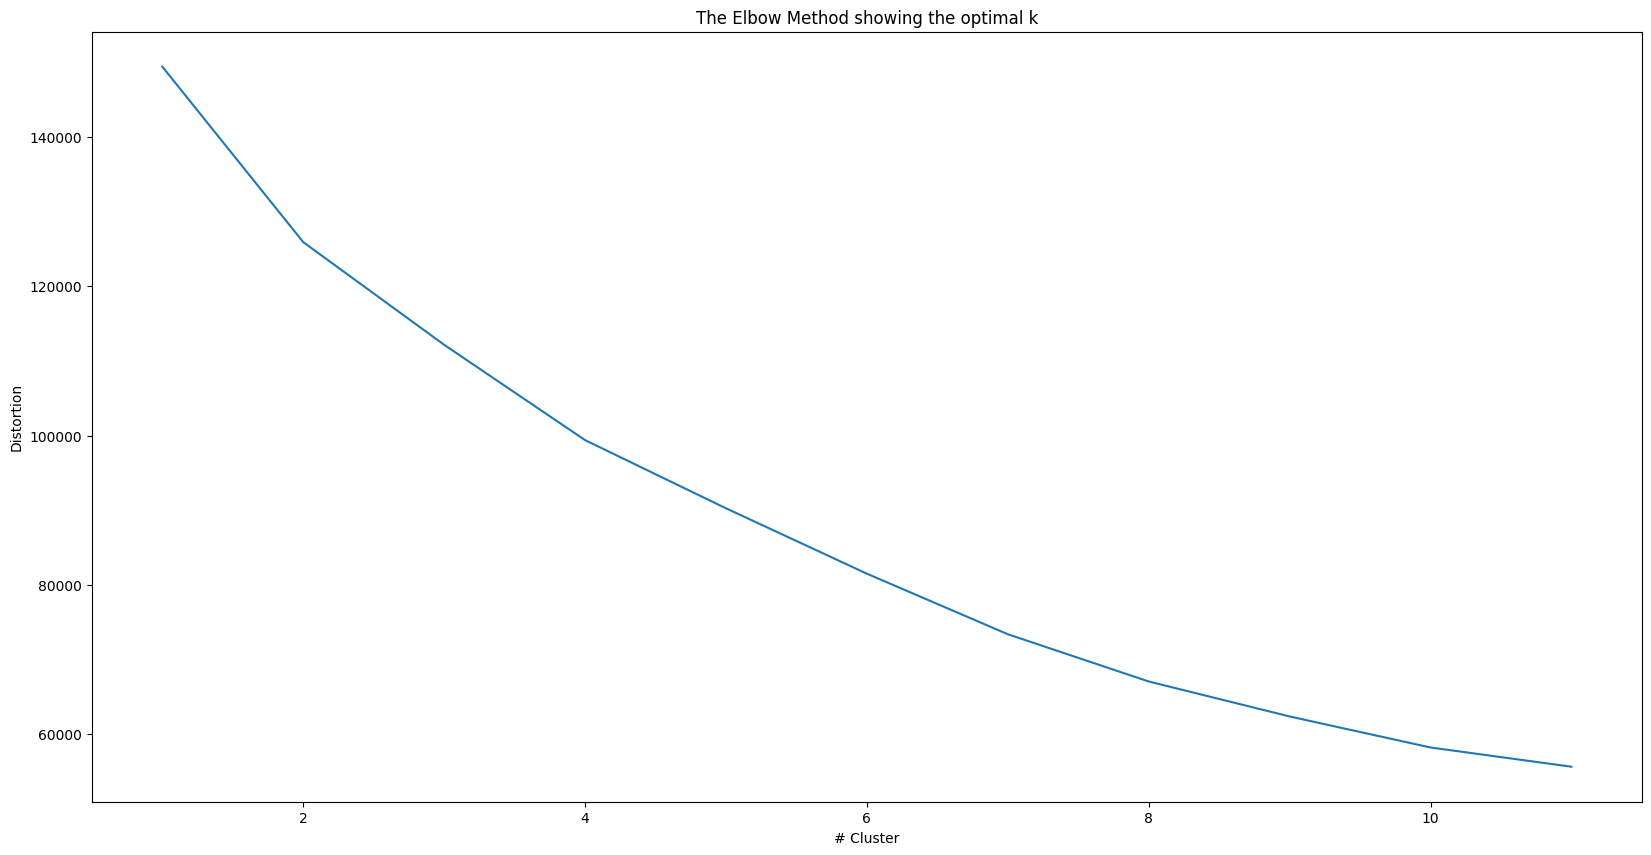

In [304]:
plt.figure(figsize=(20,10))
sns.lineplot(x = cluster_range, y = inertia);
plt.xlabel('# Cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [379]:
# Considering the elbow function we think that 2 and 8 are good number of clusters.

In [305]:
silhouette_range = list(range(2,11))
inertia2 = []
def silhouette_func(silhouette):
  silhouette_method = KMeans(n_clusters=silhouette)
  silhouette_method.fit(X)
  return silhouette_score(X, silhouette_method.labels_)
silhouette_calculated = list(map(silhouette_func, silhouette_range))
print(silhouette_calculated)

[0.389736622315755, 0.27088227613682614, 0.27813576803149304, 0.2826028079776172, 0.3025638302688398, 0.3097213827994317, 0.3215101494719427, 0.3062502384005916, 0.30659906647471646]


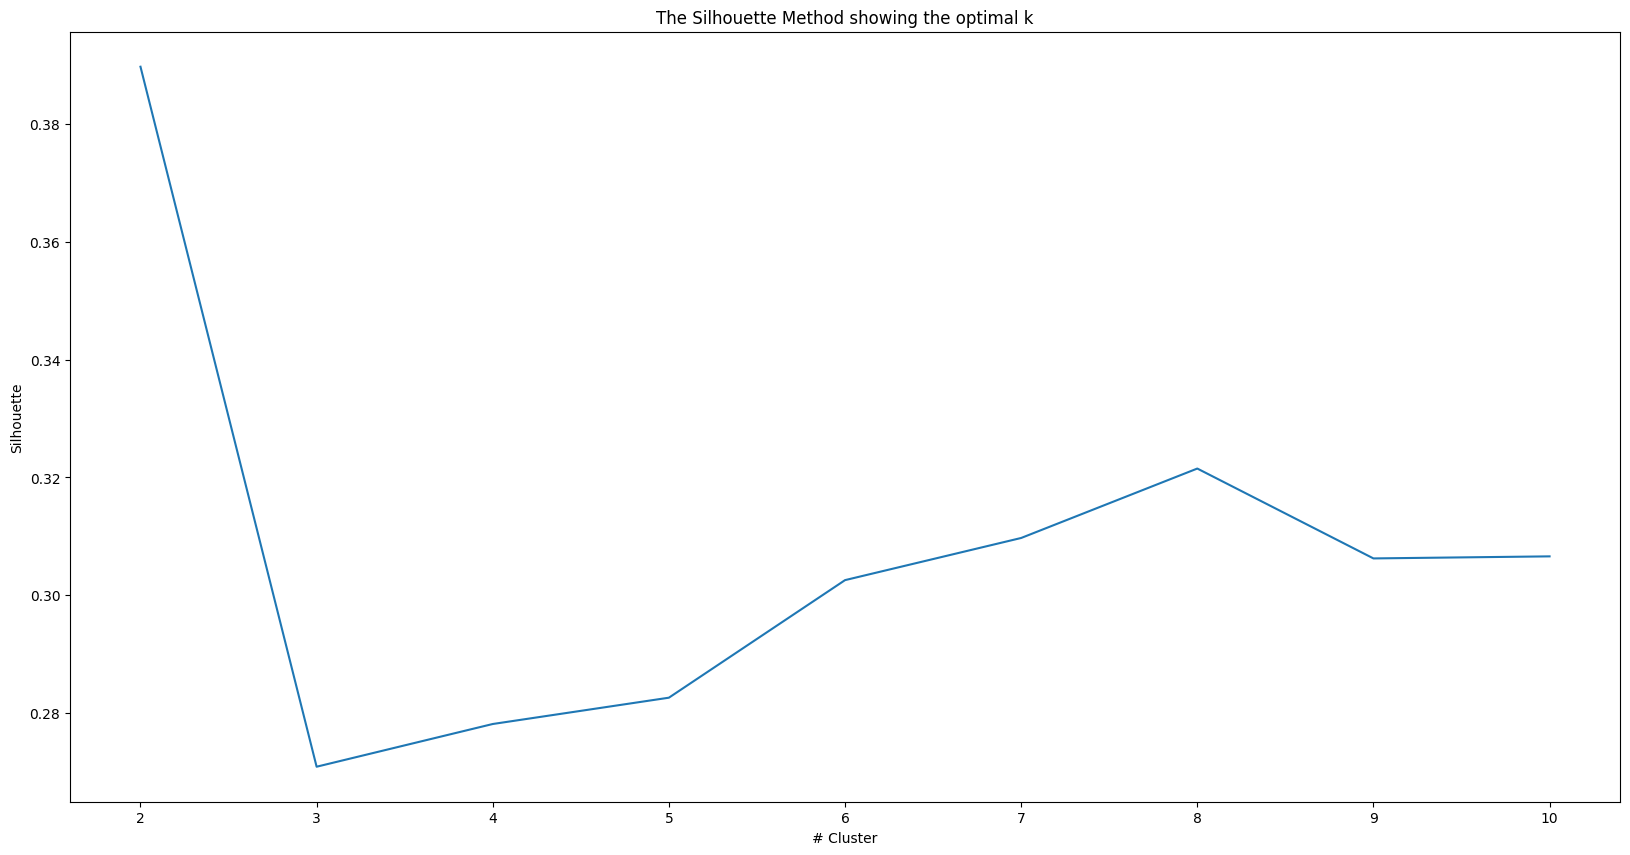

In [306]:
plt.figure(figsize=(20,10))
sns.lineplot(x = silhouette_range, y = silhouette_calculated);
plt.xlabel('# Cluster')
plt.ylabel('Silhouette')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [380]:
# With Elbow Method we got 2 and 8, and by seing this Silhouette Method we can say that 8 is the best number of clusters.

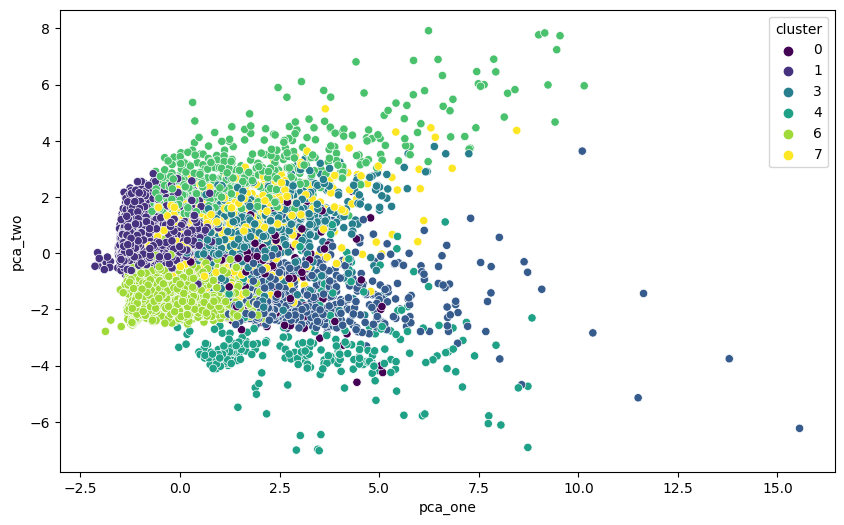

In [307]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=19)  # choose the appropriate number of clusters
km_labels = kmeans.fit_predict(X)
df['cluster'] = kmeans.fit_predict(X)

# Perform PCA

pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[metric_features])
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]
df['pca_three'] = pca_result[:, 2]
df['pca_four'] = pca_result[:, 3]

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_one', y='pca_two', hue='cluster', palette='viridis')

plt.show()

In [311]:
pca_df = df[['pca_one', 'pca_two', 'pca_three', 'pca_four']]

In [313]:
df[metric_features]

,Age,DaysWithoutFrequency,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,TotalActivities,Days_between
ID,,,,,,,,,,
10000,2.400674,-0.556365,-0.474574,-0.108134,-2.373620,-0.524371,-0.872581,-0.133633,-0.281705,-0.666193
10001,0.210807,-0.147196,-0.260600,-0.313943,-1.518776,-0.682280,0.575374,-0.133633,-0.281705,0.286695
10002,-0.213038,-0.514755,-0.520425,-0.348245,0.618335,0.107267,-0.872581,-0.133633,-0.281705,-0.744666
10003,-1.202011,-0.410729,-0.306452,-0.279642,-1.518776,-0.366461,-0.872581,-0.133633,-0.281705,-0.380326
10004,0.634652,0.893063,0.014508,-0.348245,0.618335,-0.840189,1.299351,-0.133633,-0.281705,1.351687
...,...,...,...,...,...,...,...,...,...,...
24937,-0.848806,-0.549430,1.099660,2.944701,-0.663932,0.423086,1.299351,-0.133633,-0.281705,-0.828744
24938,0.917216,-0.299768,0.259050,-0.348245,0.618335,-0.366461,-0.872581,-0.133633,-0.281705,-0.097263
24939,-0.424961,-0.549430,-0.520425,-0.348245,0.618335,0.423086,-0.872581,-0.133633,-0.281705,-0.744666


In [315]:
df.columns

Index(['Age', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences', 'TotalActivities', 'Days_between', 'Gender_Male',
       'UseByTime_True', 'AthleticsActivities_True', 'WaterActivities_True',
       'FitnessActivities_True', 'TeamActivities_True',
       'RacketActivities_True', 'CombatActivities_True',
       'SpecialActivities_True', 'OtherActivities_True', 'HasReferences_1.0',
       'Dropout_True', 'cluster', 'pca_one', 'pca_two', 'pca_three',
       'pca_four'],
      dtype='object')

In [316]:
df.drop(['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit'],
                     axis=1,inplace=True)

In [317]:
df_concat = pd.concat((df, pd.Series(km_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,TotalActivities,Days_between,Gender_Male,UseByTime_True,AthleticsActivities_True,WaterActivities_True,FitnessActivities_True,TeamActivities_True,RacketActivities_True,CombatActivities_True,SpecialActivities_True,OtherActivities_True,HasReferences_1.0,Dropout_True,cluster,pca_one,pca_two,pca_three,pca_four
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.021296,0.018244,5.951010,0.200223,-0.191854,-0.146982,-0.023657,-0.103992,-0.325240,1.610458,-0.013227,0.220896,1.542906,0.429719,0.000000,0.004016,0.236948,0.590361,0.148594,0.052209,0.112450,0.020080,0.000000,0.020080,0.730924,0.0,1.848670,-0.612175,4.805263,-1.593316
1,0.119773,0.151139,-0.047361,-0.434531,-0.301421,-0.331040,0.595047,0.383601,-0.129289,-0.445262,-0.133633,-0.290174,-0.293251,0.371674,0.037710,0.005801,0.112246,0.745617,0.011603,0.000378,0.115021,0.006558,0.000000,0.000883,0.911590,1.0,-0.821934,0.359644,0.113583,-0.140501
2,-0.560828,-0.650507,-0.364161,2.544041,1.416316,3.756626,-1.132496,-0.852318,0.271087,1.700700,-0.080191,-0.047743,0.111904,0.450980,0.016043,0.001783,0.852050,0.080214,0.080214,0.019608,0.023173,0.019608,0.000000,0.008913,0.324421,2.0,3.306166,-1.560885,-1.792907,-0.450525
3,0.368684,0.307071,-0.015861,0.662516,0.668948,-0.139348,0.384811,0.315616,-0.144024,1.506574,-0.133633,-0.089386,2.078961,0.459946,0.206121,0.007201,0.221422,0.656166,0.056706,0.002700,0.099910,0.018902,0.000000,0.000900,0.963996,3.0,1.815608,0.641126,1.188182,-0.527051
4,-0.684473,-0.761514,0.117383,1.483862,0.492115,1.318568,-0.993871,-0.754148,-0.322690,1.116452,6.641046,0.275221,0.776778,0.403509,0.031579,0.017544,0.761404,0.171930,0.094737,0.049123,0.084211,0.003509,0.000000,0.957895,0.754386,4.0,3.087040,-3.034071,-0.106575,0.456646
5,0.801249,0.687925,-0.426335,0.732266,2.031490,-0.230607,0.555826,0.637405,2.778827,0.575374,-0.125733,-0.028345,-0.171142,0.545455,0.072464,0.013175,0.206851,0.698287,0.021080,0.000000,0.035573,0.108037,0.000000,0.002635,0.492754,5.0,1.495523,2.516241,-1.694838,-0.771236
6,-0.555790,-0.554501,-0.158904,-0.015828,-0.311224,0.194571,-1.599467,-1.064925,-0.256753,-0.224749,-0.133633,-0.294870,-0.262434,0.392502,0.008626,0.003981,0.607498,0.117784,0.132382,0.081287,0.027206,0.020571,0.004977,0.000664,0.647644,6.0,-0.287993,-1.423934,-0.558618,-0.032397
7,0.205137,0.180865,-0.111502,0.291384,0.150733,-0.075856,0.171898,0.050916,-0.125016,0.410133,-0.133633,3.098348,0.259181,0.465184,0.074468,0.026112,0.519342,0.793037,0.144101,0.058027,0.398453,0.155706,0.012573,0.001934,0.738878,7.0,1.003865,0.687431,0.569703,2.806514


### How can we combine the 2 algorithms?

Use high K for KMeans

Use HC (Hierarchical Clustering) to reduce to a smaller number

Use HC to find K